<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Image_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To cluster images using CLIP embeddings, a process developed by OpenAI, you first generate embeddings for each image in your dataset. CLIP, which stands for Contrastive Language–Image Pretraining, is adept at understanding images in the context of natural language. This ability makes it highly effective for creating meaningful image embeddings. Once you have these embeddings, you can use a clustering algorithm to group the images based on similarities in their content and context. This method is particularly useful for organizing a large set of images in a way that reflects their inherent relationships and similarities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install umap-learn
!pip install scikit-learn
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2d43f1654a1c5551e54419632e03a695d7a063630dc01a9ea3ca7ec5c7e99fb6
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In this section, we're going to explore how to initialize the CLIP model with the CLIPProcessor and CLIPModel classes, using the transformers library by Hugging Face. CLIP (Contrastive Language–Image Pretraining) is an innovative model developed by OpenAI that bridges the gap between natural language processing and computer vision. This code will show you how to load the "openai/clip-vit-base-patch32" variant of the CLIP model.

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

The code snippet is a straightforward setup for using OpenAI's CLIP model in Python. The first line initializes the CLIP processor, which is essential for preparing and processing both images and text data in a format that the CLIP model can understand. The second line loads the actual CLIP model, specifically the 'clip-vit-base-patch32' variant, which is a pre-trained model optimized for linking visual and textual data. This setup is key for a variety of applications in AI, such as image recognition and generating image descriptions, providing a powerful tool for bridging computer vision and natural language processing.

In [ ]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]


This code snippet is designed for loading images from a specified directory into Python. It starts by importing the os module and sets the path to the directory containing the images. The script then iterates through each file in this directory, checking if the file is an image based on its extension (.png, .jpg, .jpeg). For each image file, it attempts to open the image using the Image.open method and appends the opened image to a list named images. If an image cannot be opened due to an IO error, the script prints an error message specifying the filename. This is a useful script for batch processing of images in data analysis or machine learning projects.

In [ ]:
import os

# Directory containing images
image_dir = '/content/drive/MyDrive/Urban100_LR_x4'

images = []
for filename in os.listdir(image_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        try:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path)
            images.append(img)
        except IOError as e:
            print(f"Could not read image {filename}: {e}")

This function, get_clip_embeddings, is designed to generate embeddings for a list of images using the previously initialized CLIP model and processor. The function takes the images as input and processes them with the processor, specifically formatting them for PyTorch ('pt'). The core computation happens inside a torch.no_grad() block, which is a context manager that disables gradient calculation, reducing memory consumption and speeding up the process. This is particularly important as it ensures that the model is used only for inference. The model's get_image_features method is then called to obtain the embeddings for the images. Finally, the function returns these embeddings.

The last line of the code converts the embeddings from a PyTorch tensor to a NumPy array using .numpy(). This is typically done for further processing or analysis, as NumPy arrays are a common format for data manipulation in Python. This setup is particularly useful in scenarios where image embeddings are needed for tasks like similarity search, clustering, or as input features for machine learning models.

In [ ]:
def get_clip_embeddings(images):
    inputs = processor(images=images, return_tensors="pt")
    with torch.no_grad():
        outputs = model.get_image_features(**inputs)
    return outputs

embeddings = get_clip_embeddings(images).numpy()


The provided code snippet utilizes UMAP (Uniform Manifold Approximation and Projection) for reducing the dimensionality of image embeddings. It configures UMAP with 5 nearest neighbors, 2 output components, and uses cosine similarity as the metric. The fit_transform method is then applied to the embeddings, transforming them into a 2D space. This process is essential for visualizing and analyzing high-dimensional data, such as image embeddings, in a more interpretable two-dimensional format.

In [ ]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embeddings_reduced = reducer.fit_transform(embeddings)

The code applies K-Means clustering to 2D image embeddings. It initializes a K-Means model with three clusters and ten initializations for stability. By using fit_predict on the reduced embeddings, it efficiently groups the data into three distinct clusters. This approach is crucial for categorizing images into meaningful segments based on their reduced features.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings_reduced)

In [ ]:
!pip install matplotlib

This code creates a simple visualization of the first five images from a list of PIL image objects. It uses matplotlib to plot these images in a single row. Each image is displayed in a separate subplot without axis labels (plt.axis('off')), and is titled 'Image X' where X is the image number (1 through 5). The plt.figure(figsize=(15, 3)) sets the figure size, ensuring that the images are displayed in an appropriately sized window. This is a useful way to quickly visualize and check the first few images in a dataset or a list of processed images.

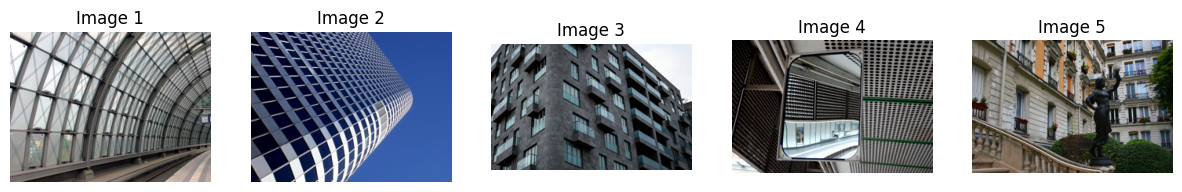

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'images' is your list of PIL image objects
num_images_to_display = 5

plt.figure(figsize=(15, 3))
for i, img in enumerate(images[:num_images_to_display]):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')
plt.show()

This code is designed to display the first image from each of up to five different clusters, obtained from a clustering algorithm like K-Means. It first determines the number of clusters to display, limiting it to a maximum of five. Using matplotlib, the code creates a subplot for each of these clusters. For each cluster, it locates the first image that belongs to that cluster and displays it in the corresponding subplot without axis labels, titled 'Cluster X', where X is the cluster number. This visualization is an effective way to quickly get a sense of the kinds of images that are grouped together in each cluster, helping in understanding the clustering output.

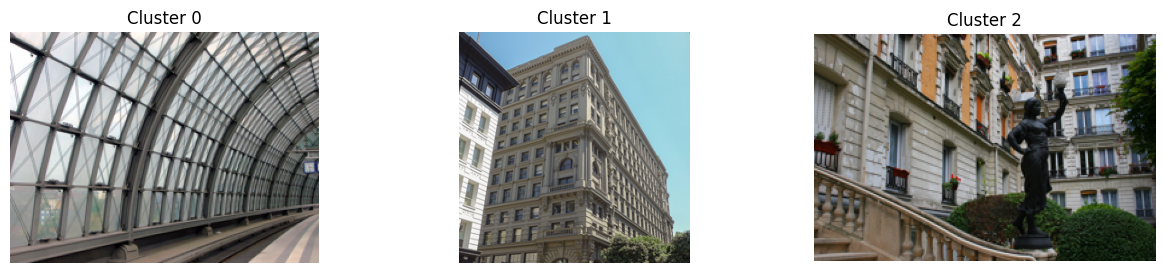

In [13]:
import matplotlib.pyplot as plt

# Define the number of clusters to display
num_clusters_to_display = min(6, len(set(clusters)))  # Display up to 5 clusters

plt.figure(figsize=(15, 3))
for cluster_num in range(num_clusters_to_display):
    # Find the first image in each cluster
    for img, cluster in zip(images, clusters):
        if cluster == cluster_num:
            plt.subplot(1, num_clusters_to_display, cluster_num + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Cluster {cluster_num}')
            break  # Move to the next cluster after displaying the first image

plt.show()

This code snippet efficiently visualizes the first three images from each cluster obtained through clustering. It first determines the total number of clusters and sets a limit of three images per cluster for display. A grid of subplots is created using matplotlib, with each row representing a cluster and each column a sample image from that cluster. For each cluster, it selects the first three images and displays them in the corresponding subplots. The code handles both single and multiple cluster scenarios gracefully. Each image is displayed without axis labels and is titled with its cluster number and image sequence within the cluster. This visualization is particularly useful for analyzing and presenting the clustering results, offering a clear insight into the types of images grouped in each cluster.

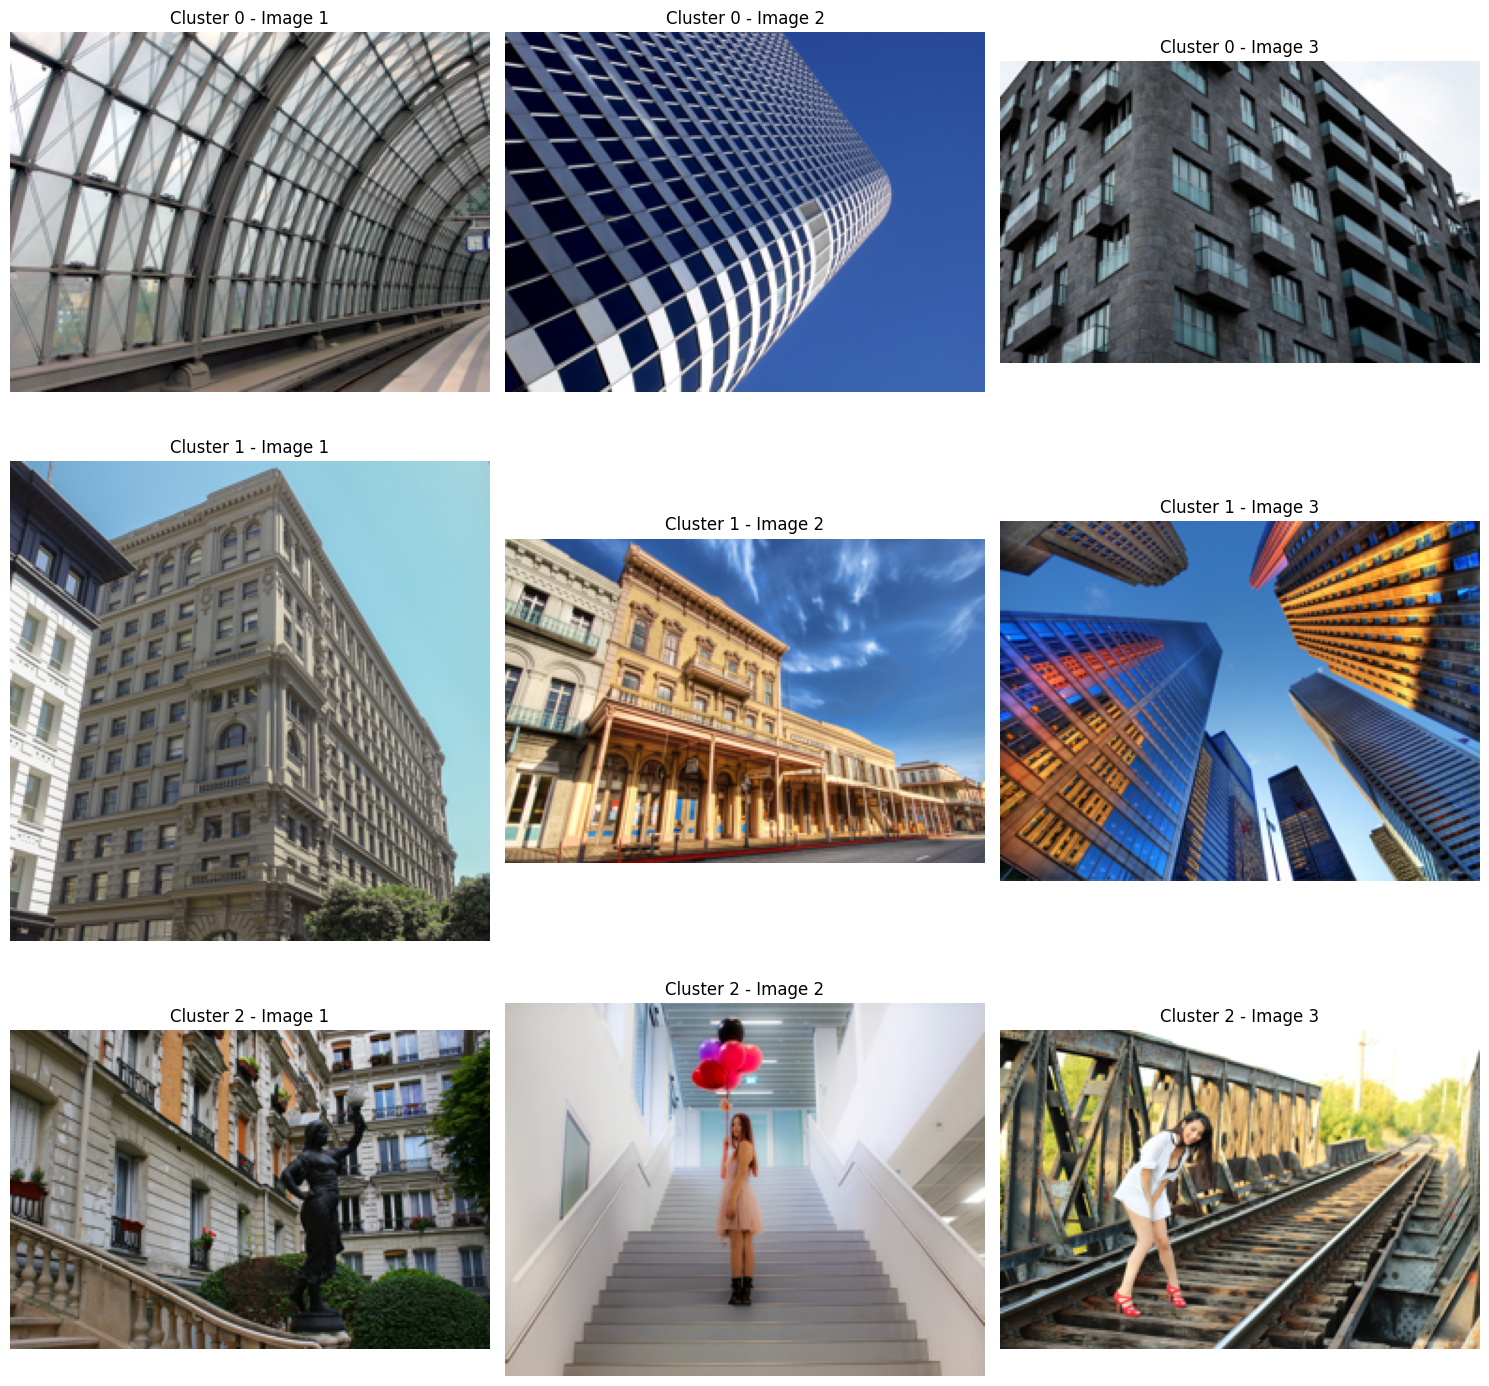

In [ ]:
import matplotlib.pyplot as plt

# Determine the number of clusters
num_clusters = len(set(clusters))
images_per_cluster = 3

# Create subplots
fig, axs = plt.subplots(num_clusters, images_per_cluster, figsize=(5 * images_per_cluster, 5 * num_clusters))

for cluster_num in range(num_clusters):
    # Get the first three images of this cluster
    cluster_images = [img for img, cluster in zip(images, clusters) if cluster == cluster_num][:images_per_cluster]

    for i, img in enumerate(cluster_images):
        if num_clusters > 1:
            ax = axs[cluster_num, i]
        else:
            ax = axs[i]

        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Cluster {cluster_num} - Image {i+1}')

plt.tight_layout()
plt.show()